In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
df = pd.read_csv('Zoo.csv', index_col=0)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [12]:
df.isna().any()

hair        False
feathers    False
eggs        False
milk        False
airborne    False
aquatic     False
predator    False
toothed     False
backbone    False
breathes    False
venomous    False
fins        False
legs        False
tail        False
domestic    False
catsize     False
type        False
dtype: bool

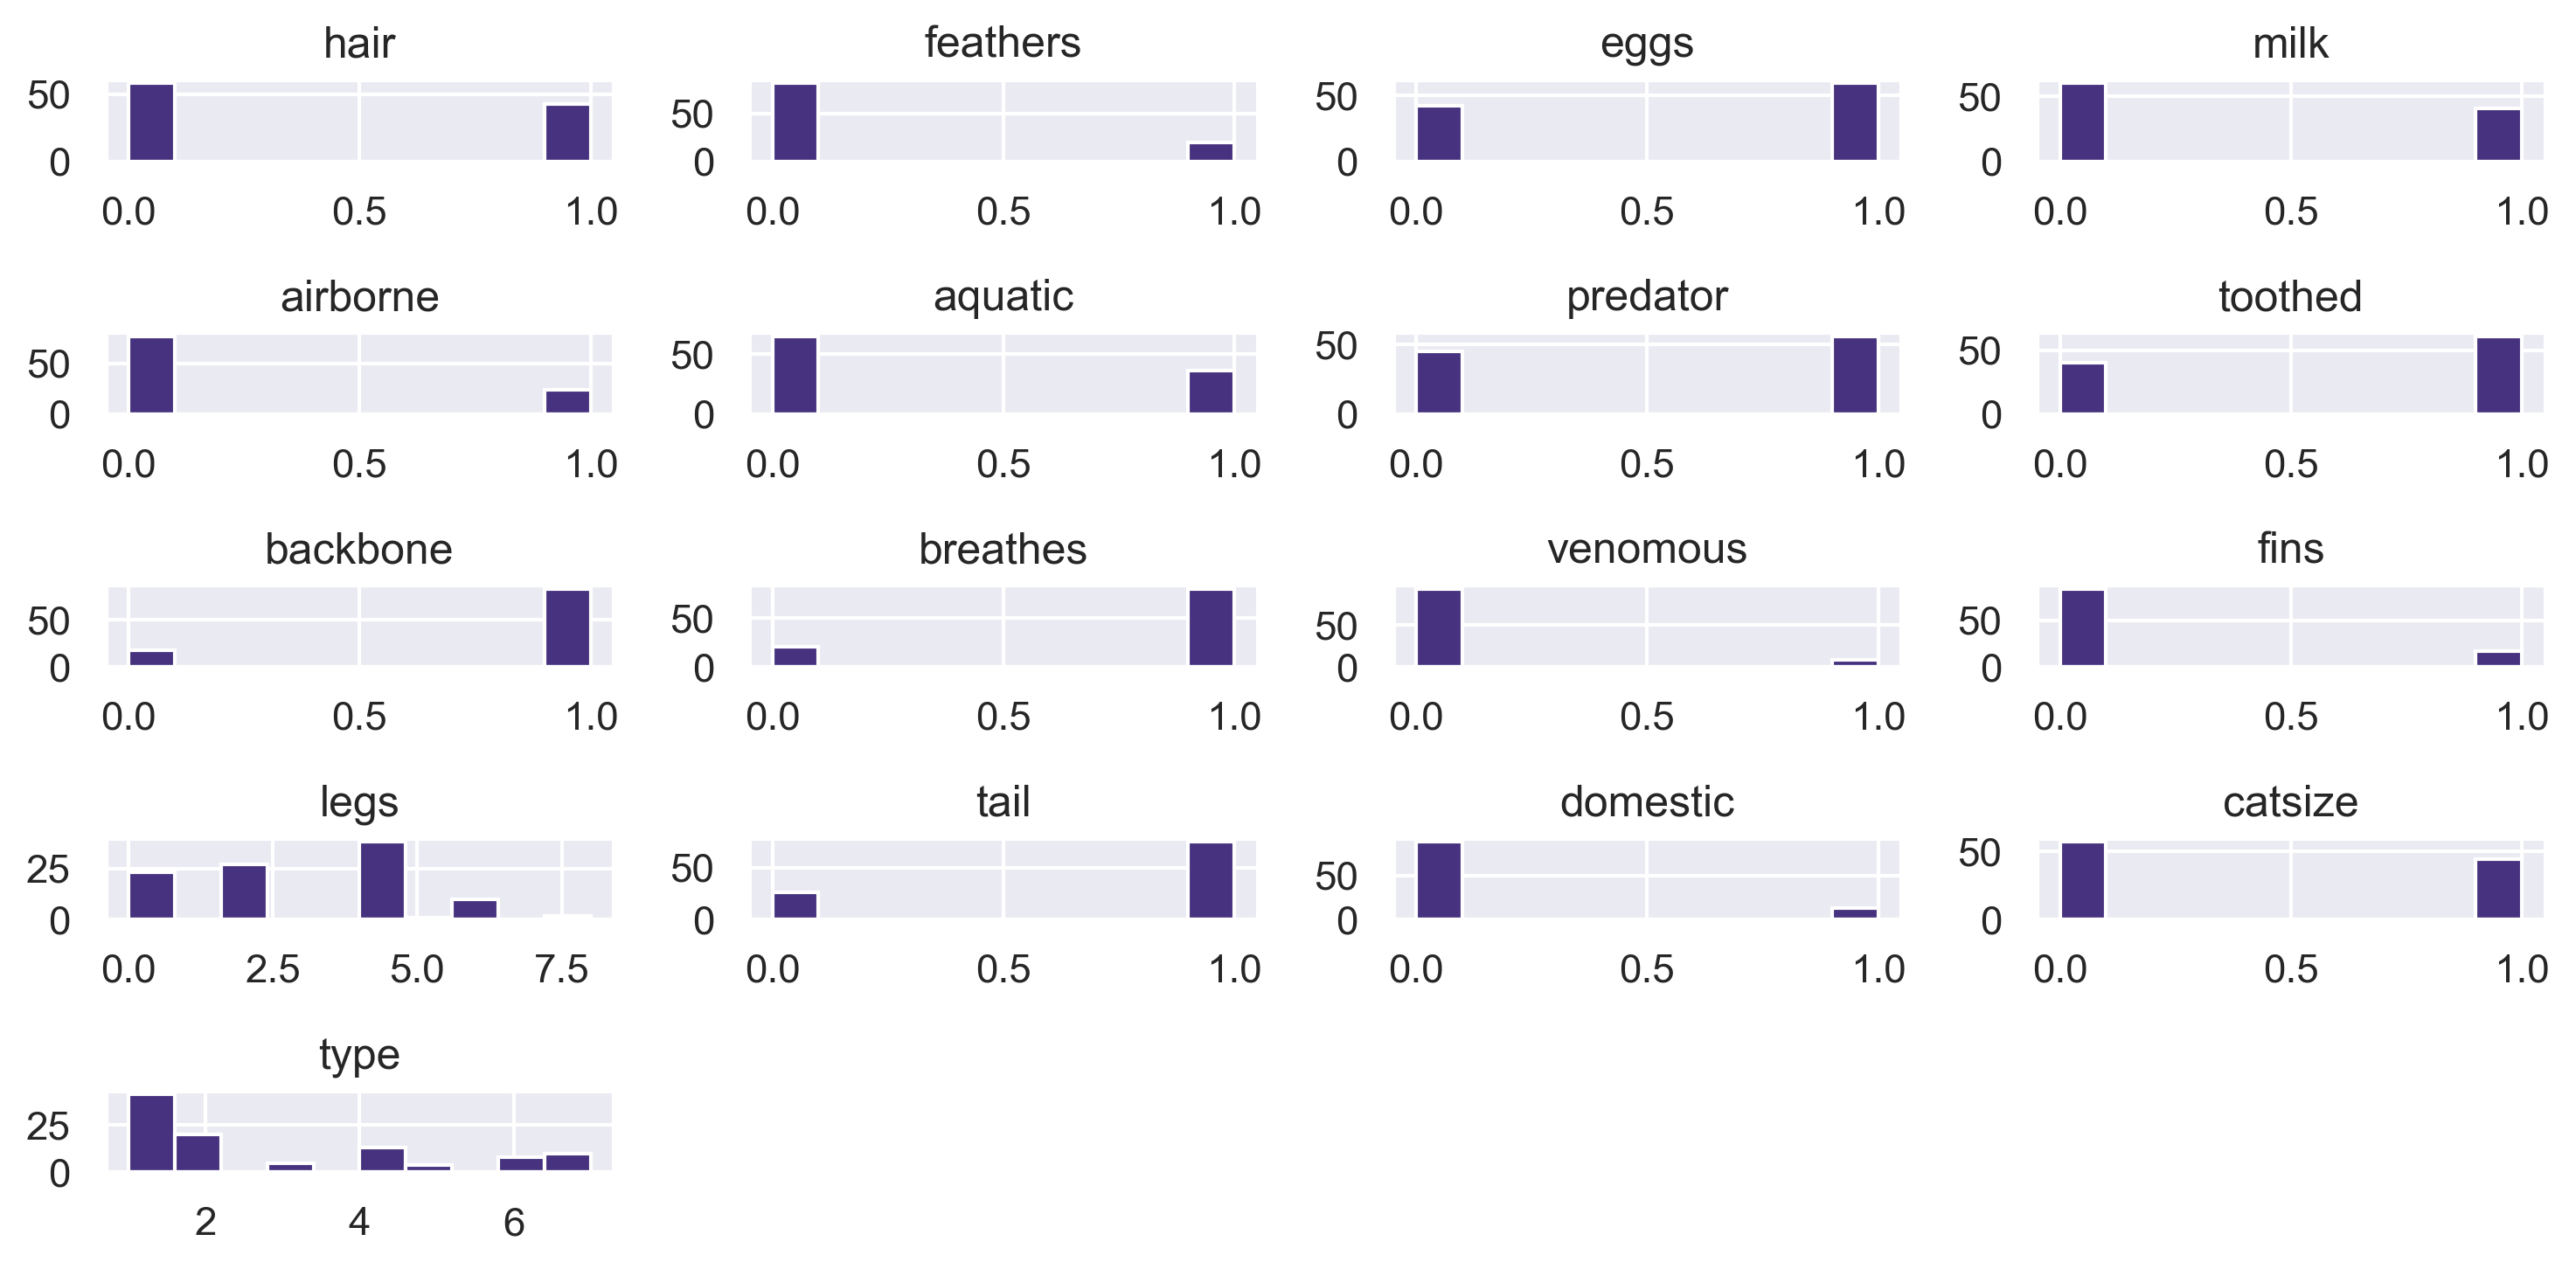

In [13]:
df.hist()
plt.tight_layout()

# Model Building

In [14]:
x =df.iloc[:,:-1]
y=df['type']

In [15]:
sc = StandardScaler()
scaled = sc.fit_transform(x)
scaled

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled,y,test_size=0.2,random_state=42)

# Model

In [18]:
knn = KNeighborsClassifier().fit(xtrain,ytrain)


In [27]:
print('Train Report')
print(classification_report(ytrain,knn.predict(xtrain)))

Train Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       0.95      1.00      0.97        18
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         4
           6       0.83      1.00      0.91         5
           7       1.00      0.89      0.94         9

    accuracy                           0.97        80
   macro avg       0.97      0.95      0.95        80
weighted avg       0.98      0.97      0.97        80



In [25]:
ypred = knn.predict(xtest)

In [26]:
print('Test Report')
print(classification_report(ytest,ypred))

Test Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [29]:
print('Training Accuracy:', knn.score(xtrain,ytrain))
print('Testing Accuracy:', knn.score(xtest,ytest))

Training Accuracy: 0.975
Testing Accuracy: 0.9523809523809523


# Hyperparameter Tuning

In [43]:
trainac = []
testac = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    print(f'For neighbour = {i}')
    print(f"Train Accuracy : {knn.score(xtrain,ytrain)}")
    print(f"Test Accuracy : {knn.score(xtest,ytest)} \n")
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

For neighbour = 1
Train Accuracy : 1.0
Test Accuracy : 1.0 

For neighbour = 2
Train Accuracy : 0.95
Test Accuracy : 1.0 

For neighbour = 3
Train Accuracy : 0.975
Test Accuracy : 1.0 

For neighbour = 4
Train Accuracy : 0.9375
Test Accuracy : 0.9523809523809523 

For neighbour = 5
Train Accuracy : 0.975
Test Accuracy : 0.9523809523809523 

For neighbour = 6
Train Accuracy : 0.95
Test Accuracy : 0.9523809523809523 

For neighbour = 7
Train Accuracy : 0.975
Test Accuracy : 0.9523809523809523 

For neighbour = 8
Train Accuracy : 0.95
Test Accuracy : 0.9523809523809523 

For neighbour = 9
Train Accuracy : 0.9375
Test Accuracy : 0.9047619047619048 

For neighbour = 10
Train Accuracy : 0.9375
Test Accuracy : 0.9047619047619048 

For neighbour = 11
Train Accuracy : 0.8625
Test Accuracy : 0.8571428571428571 

For neighbour = 12
Train Accuracy : 0.8625
Test Accuracy : 0.8571428571428571 

For neighbour = 13
Train Accuracy : 0.85
Test Accuracy : 0.8571428571428571 

For neighbour = 14
Train Acc

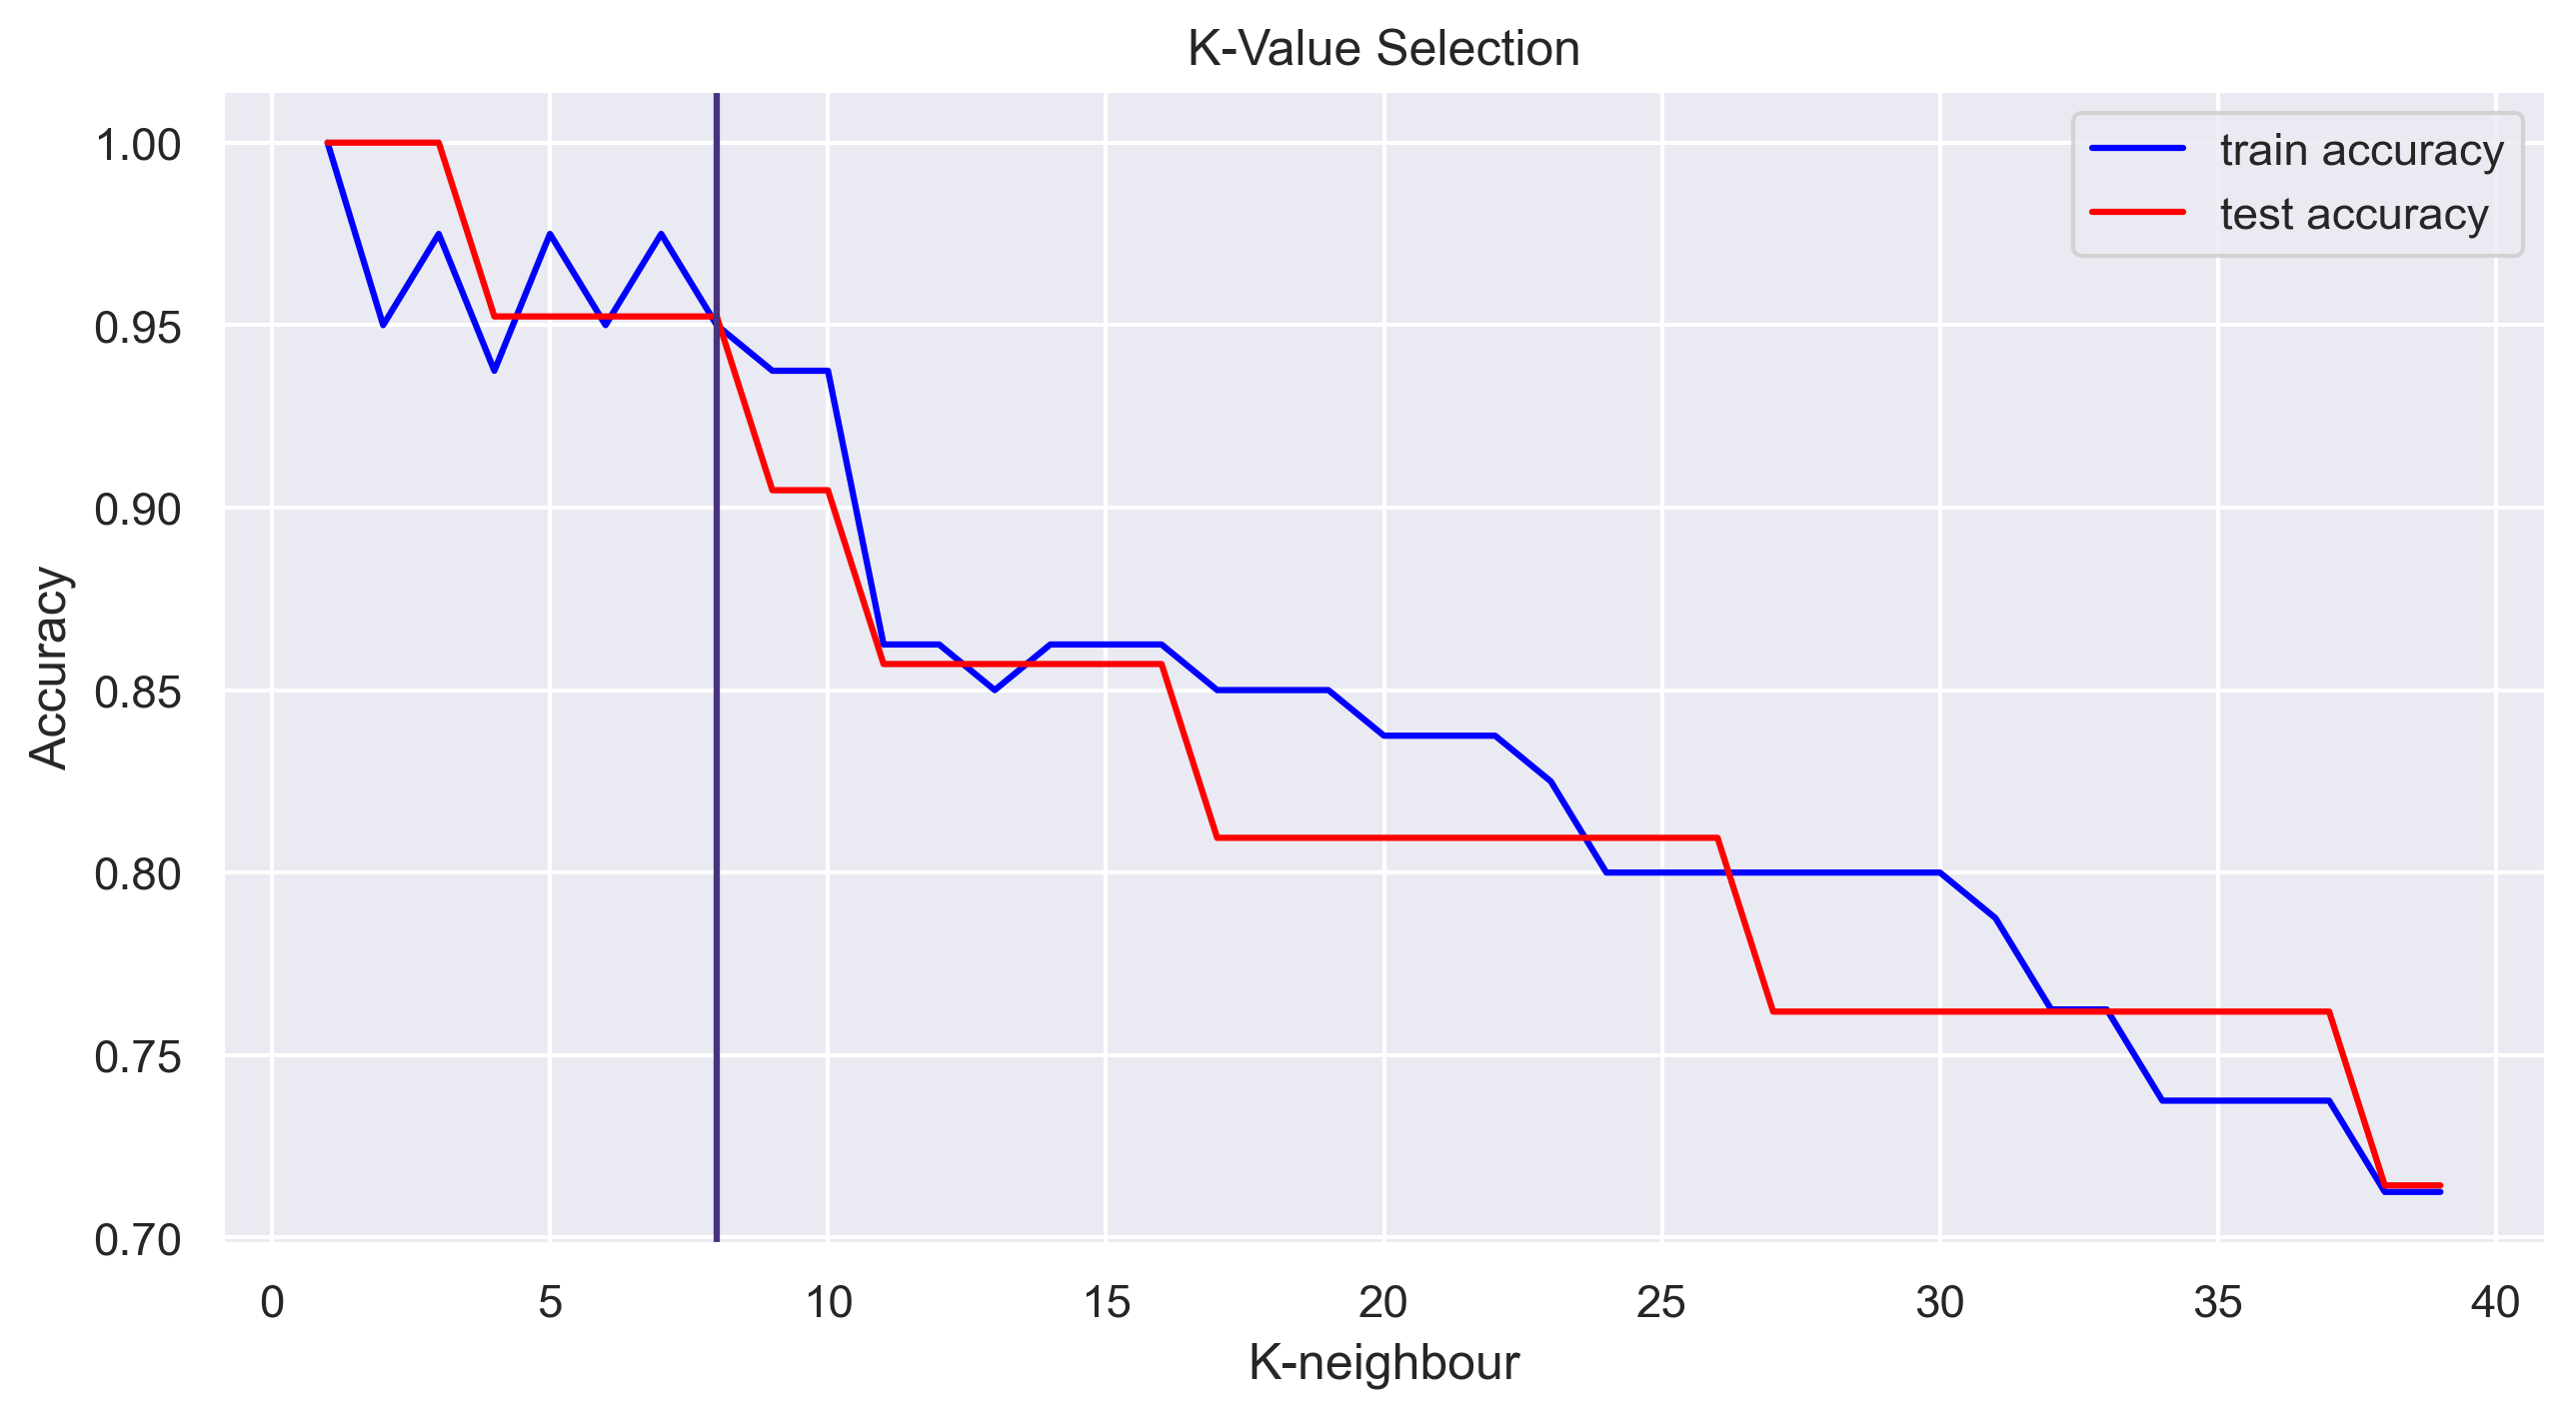

In [44]:
plt.plot(range(1,40),trainac,color='blue',label='train accuracy')
plt.plot(range(1,40),testac,color='red',label='test accuracy')
plt.xlabel('K-neighbour')
plt.ylabel('Accuracy')
plt.axvline(8)
plt.legend()
plt.title('K-Value Selection')
plt.show()

# Final Model

In [45]:
fknn = KNeighborsClassifier(n_neighbors=8).fit(xtrain,ytrain)

In [48]:
print('Train Report')
print(classification_report(ytrain,fknn.predict(xtrain)))

Train Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       0.95      1.00      0.97        18
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         4
           6       0.62      1.00      0.77         5
           7       1.00      0.67      0.80         9

    accuracy                           0.95        80
   macro avg       0.94      0.92      0.91        80
weighted avg       0.96      0.95      0.95        80



In [49]:
print('Test Report')
print(classification_report(ytest,fknn.predict(xtest)))

Test Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [50]:
print('Training accuracy: ', fknn.score(xtrain,ytrain))
print('Testing Accuracy: ', fknn.score(xtest,ytest))

Training accuracy:  0.95
Testing Accuracy:  0.9523809523809523


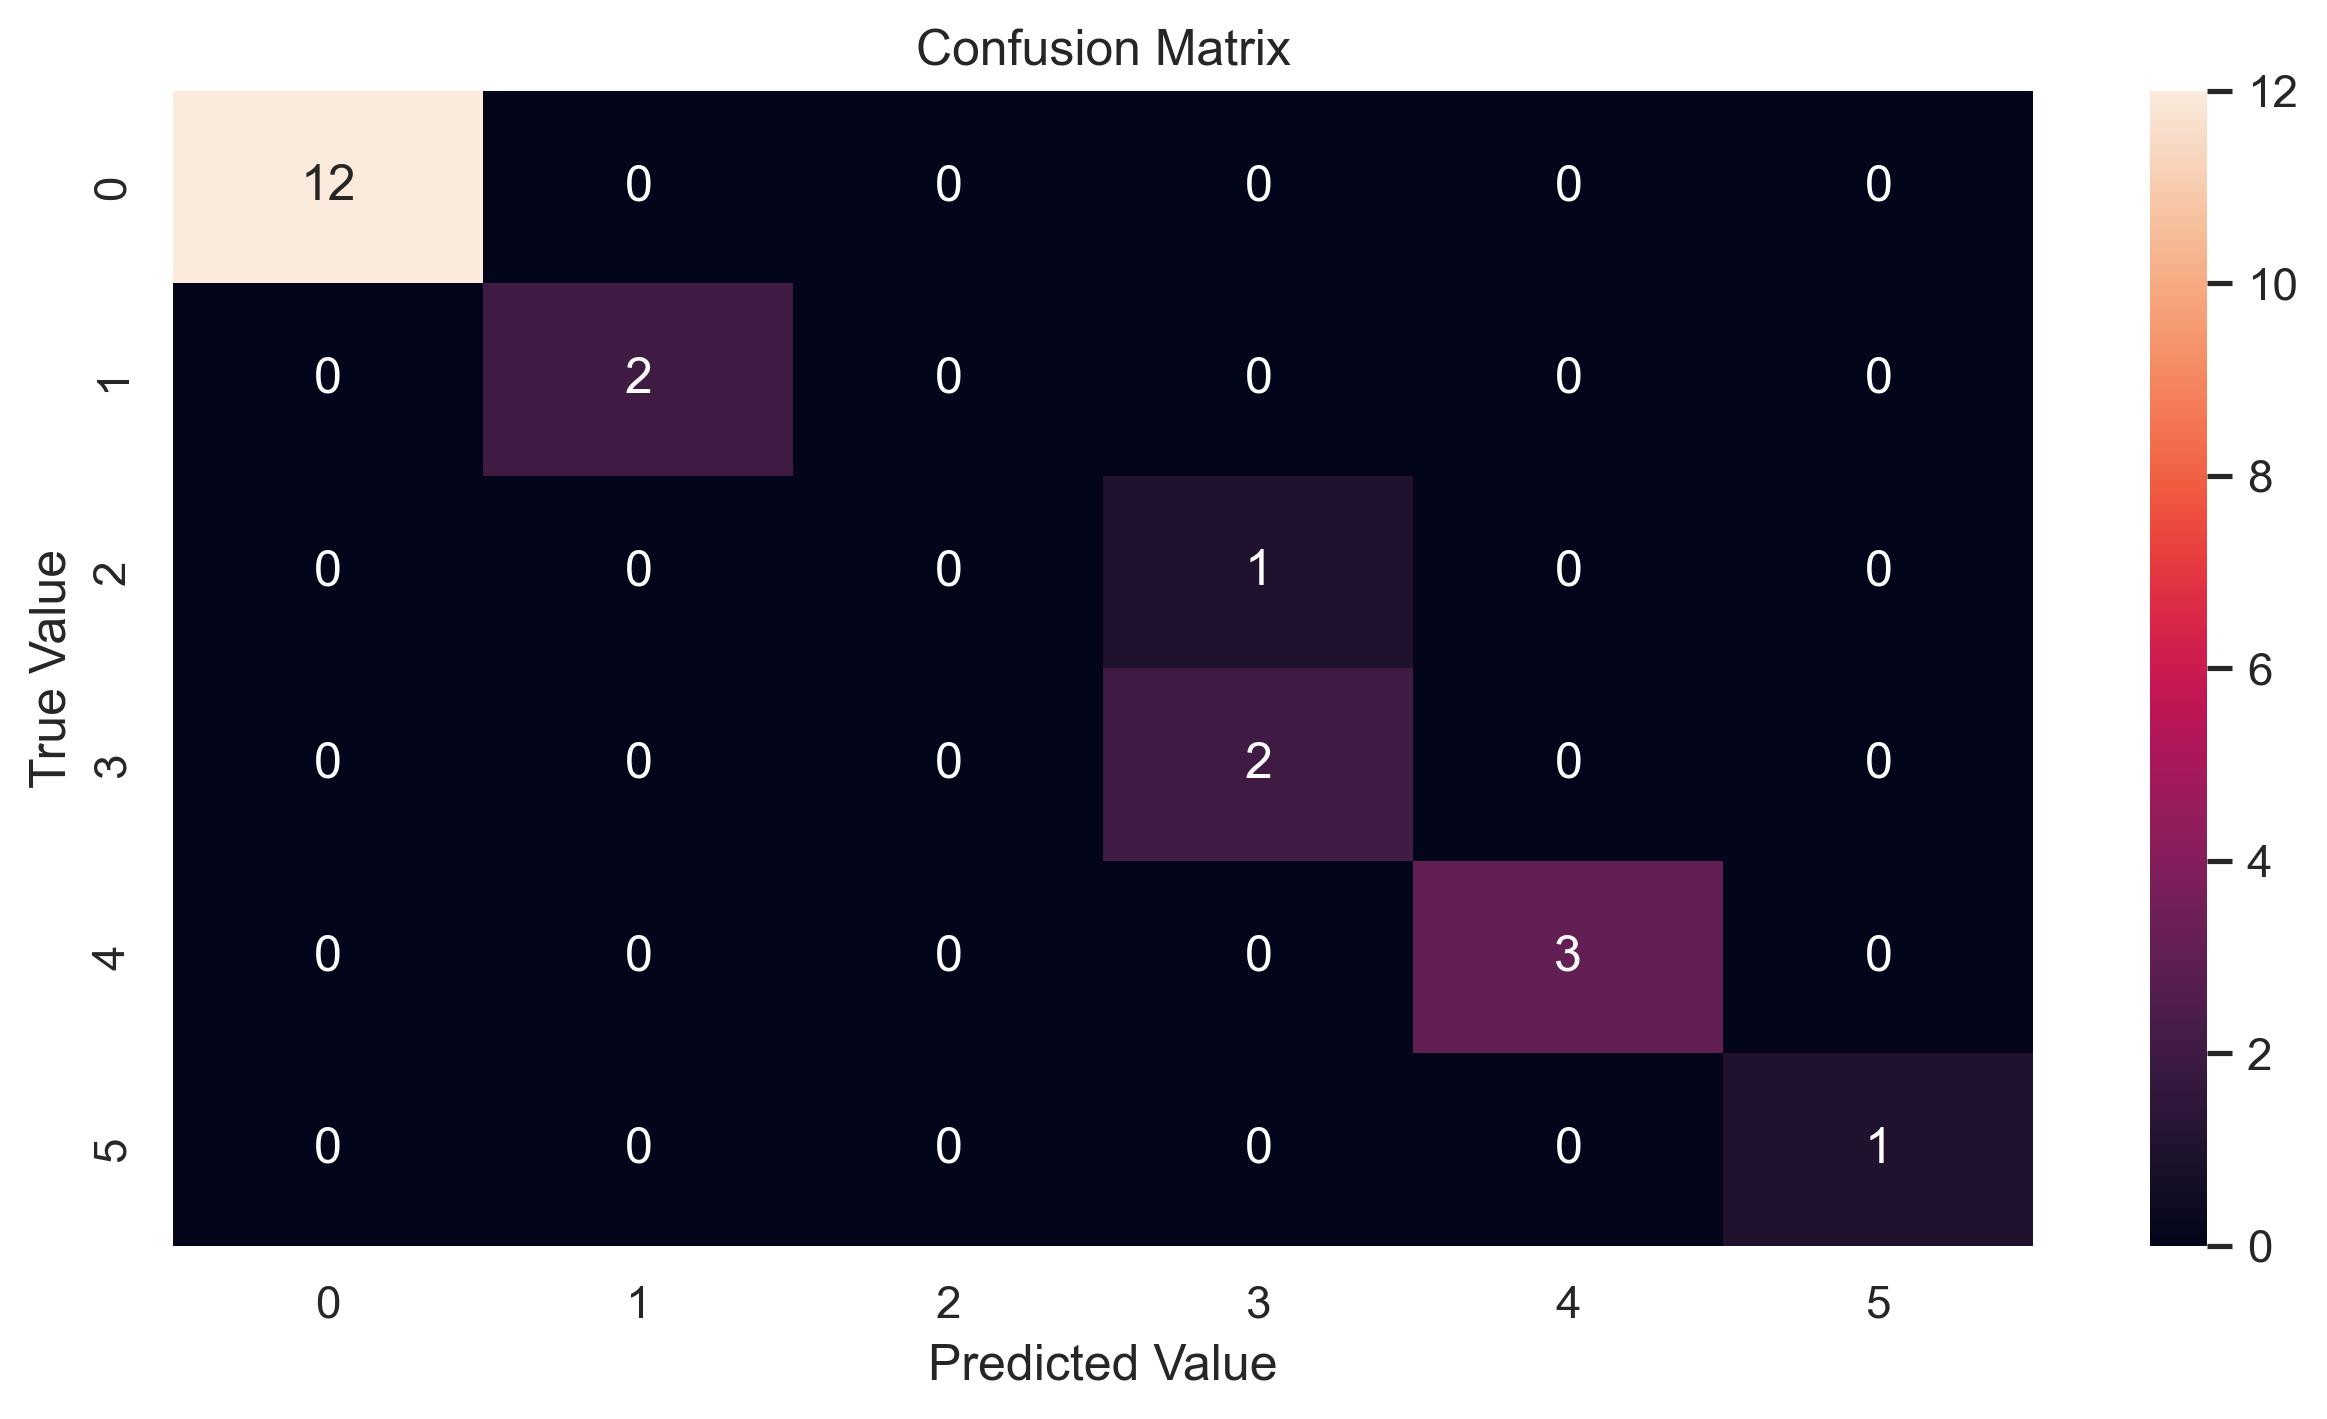

In [51]:
sns.heatmap(confusion_matrix(ytest,fknn.predict(xtest)),annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()